# 1. Import Params

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt
import src.util as util
from imblearn.over_sampling import RandomOverSampler

In [3]:
params = util.load_config()
params

{'dataset_path': 'data/raw/train.csv',
 'dataset_cleaned_path': 'data/processed/raw_dataset.pkl',
 'train_set_path': ['data/processed/x_train.pkl',
  'data/processed/y_train.pkl'],
 'valid_set_path': ['data/processed/x_valid.pkl',
  'data/processed/y_valid.pkl'],
 'test_set_path': ['data/processed/x_test.pkl', 'data/processed/y_test.pkl'],
 'train_feng_set_path': ['data/processed/x_train_feng.pkl',
  'data/processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['data/processed/x_valid_feng.pkl',
  'data/processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['data/processed/x_test_feng.pkl',
  'data/processed/y_test_feng.pkl'],
 'production_model_path': 'models/production_model.pkl',
 'ohe_Gender_path': 'models/ohe_Gender.pkl',
 'ohe_Married_path': 'models/ohe_Married.pkl',
 'ohe_Dependents_path': 'models/ohe_Dependents.pkl',
 'ohe_Education_path': 'models/ohe_Education.pkl',
 'ohe_Self_Employed_path': 'models/ohe_Self_Employed.pkl',
 'ohe_Property_Area_path': 'models/ohe_Property_Area.pk

# 2. Load Train Data

In [4]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [5]:
x_train

,ApplicantIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
197,1907,Female,No,0,Not Graduate,No,Urban,2365.0,120.0,360.0,1.0
175,3497,Male,Yes,0,Graduate,No,Rural,1964.0,116.0,360.0,1.0
526,3775,Male,Yes,0,Graduate,No,Semiurban,0.0,110.0,360.0,1.0
149,4860,Male,Yes,0,Graduate,No,Semiurban,830.0,125.0,360.0,1.0
507,3583,Unknown,No,0,Graduate,No,Urban,0.0,96.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14,1299,Male,Yes,2,Graduate,No,Urban,1086.0,17.0,120.0,1.0
297,4666,Female,Yes,1,Graduate,No,Urban,0.0,135.0,360.0,1.0
395,3276,Male,Yes,2,Graduate,No,Semiurban,484.0,135.0,360.0,1.0
310,2917,Female,No,0,Graduate,No,Semiurban,0.0,84.0,360.0,1.0


In [6]:
y_train

197    Y
175    Y
526    Y
149    Y
507    N
      ..
14     Y
297    Y
395    Y
310    Y
267    Y
Name: Loan_Status, Length: 429, dtype: object

In [7]:
y_train_encoded = y_train.map({'Y': 1, 'N': 0})
y_train_encoded

197    1
175    1
526    1
149    1
507    0
      ..
14     1
297    1
395    1
310    1
267    1
Name: Loan_Status, Length: 429, dtype: int64

In [8]:
#gabungkan x dan y train
dataset = pd.concat([x_train, y_train_encoded], axis = 1)

In [9]:
dataset

,ApplicantIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
197,1907,Female,No,0,Not Graduate,No,Urban,2365.0,120.0,360.0,1.0,1
175,3497,Male,Yes,0,Graduate,No,Rural,1964.0,116.0,360.0,1.0,1
526,3775,Male,Yes,0,Graduate,No,Semiurban,0.0,110.0,360.0,1.0,1
149,4860,Male,Yes,0,Graduate,No,Semiurban,830.0,125.0,360.0,1.0,1
507,3583,Unknown,No,0,Graduate,No,Urban,0.0,96.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14,1299,Male,Yes,2,Graduate,No,Urban,1086.0,17.0,120.0,1.0,1
297,4666,Female,Yes,1,Graduate,No,Urban,0.0,135.0,360.0,1.0,1
395,3276,Male,Yes,2,Graduate,No,Semiurban,484.0,135.0,360.0,1.0,1
310,2917,Female,No,0,Graduate,No,Semiurban,0.0,84.0,360.0,1.0,1


# 3. EDA

### 3.1 Cek Missing Values

In [10]:
dataset.isnull().sum()

ApplicantIncome      0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

### 3.2 Cek Jumlah Masing-masing Label

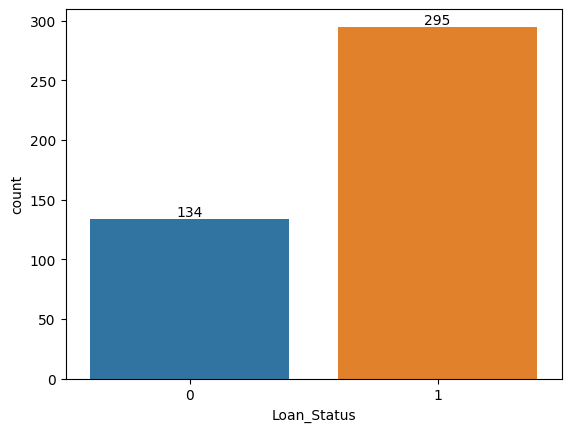

In [13]:
ax = sns.countplot(data = dataset, x = "Loan_Status", label = dataset["Loan_Status"].unique())
ax.bar_label(ax.containers[0])
plt.show()

In [20]:
x, y = RandomOverSampler(random_state = 42).fit_resample(x_train, y_train_encoded)
train_set_bal = pd.concat([x, y], axis = 1)
train_set_bal

,ApplicantIncome,Gender,Married,Dependents,Education,Self_Employed,Property_Area,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1907,Female,No,0,Not Graduate,No,Urban,2365.0,120.0,360.0,1.0,1
1,3497,Male,Yes,0,Graduate,No,Rural,1964.0,116.0,360.0,1.0,1
2,3775,Male,Yes,0,Graduate,No,Semiurban,0.0,110.0,360.0,1.0,1
3,4860,Male,Yes,0,Graduate,No,Semiurban,830.0,125.0,360.0,1.0,1
4,3583,Unknown,No,0,Graduate,No,Urban,0.0,96.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
585,4200,Male,Yes,2,Not Graduate,No,Rural,1430.0,129.0,360.0,1.0,0
586,6500,Male,No,0,Graduate,No,Rural,0.0,105.0,360.0,0.0,0
587,4050,Male,Yes,1,Not Graduate,No,Rural,5302.0,138.0,360.0,1.0,0
588,3597,Male,Yes,0,Graduate,No,Rural,2157.0,119.0,360.0,0.0,0


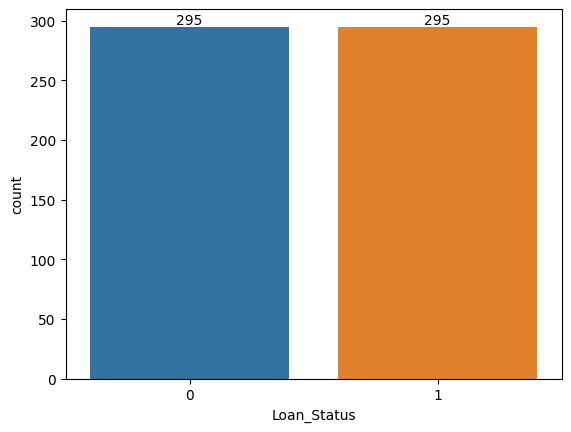

In [21]:
ax = sns.countplot(data = train_set_bal, x = "Loan_Status", label = dataset["Loan_Status"].unique())
ax.bar_label(ax.containers[0])
plt.show()

# 3.3. Cek Informasi Statistik

### Cek Skewness

In [15]:
dataset.skew(numeric_only = True)

ApplicantIncome      6.439850
CoapplicantIncome    8.017716
LoanAmount           2.792992
Loan_Amount_Term    -2.466796
Credit_History      -2.232010
Loan_Status         -0.812616
dtype: float64

### Pemisahan Dataset berdasarkan Kelas

In [22]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_yes = dataset[dataset['Loan_Status'] == 1].copy()
dataset_no = dataset[dataset['Loan_Status'] != 1].copy()

In [23]:
dataset_yes.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.0
mean,5561.979661,1533.803390,148.379661,342.630508,0.983051,1.0
std,6264.352826,2054.191561,91.224875,61.319913,0.129300,0.0
min,210.000000,0.000000,17.000000,12.000000,0.000000,1.0
25%,2928.000000,0.000000,104.500000,360.000000,1.000000,1.0
50%,3846.000000,1167.000000,128.000000,360.000000,1.000000,1.0
75%,5773.000000,2227.500000,160.000000,360.000000,1.000000,1.0
max,63337.000000,20000.000000,700.000000,480.000000,1.000000,1.0


In [24]:
dataset_no.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.0
mean,5758.014925,1709.798507,148.597015,337.164179,0.626866,0.0
std,7774.024196,3957.182243,82.490566,70.170276,0.485452,0.0
min,416.000000,0.000000,9.000000,36.000000,0.000000,0.0
25%,2896.000000,0.000000,99.250000,360.000000,0.000000,0.0
50%,4108.000000,0.000000,128.000000,360.000000,1.000000,0.0
75%,6042.000000,2313.250000,175.750000,360.000000,1.000000,0.0
max,81000.000000,41667.000000,570.000000,480.000000,1.000000,0.0


### Visualisasi Fitur ApplicantIncome

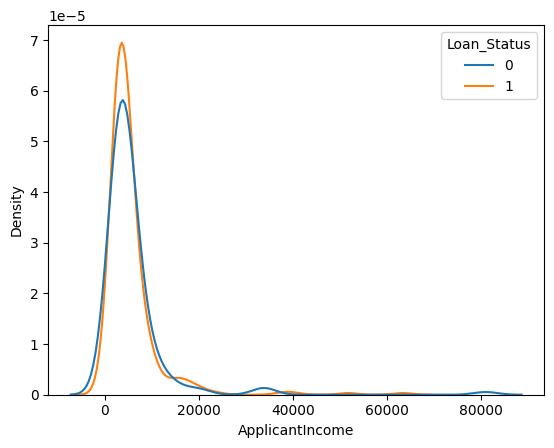

In [25]:
sns.kdeplot(data = train_set_bal, x = "ApplicantIncome", hue = "Loan_Status")
plt.show()

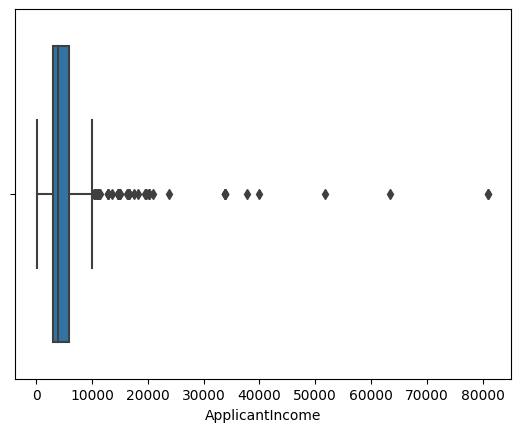

In [26]:
sns.boxplot(data = train_set_bal, x = "ApplicantIncome")
plt.show()

### Visualisasi Fitur CoapplicantIncome

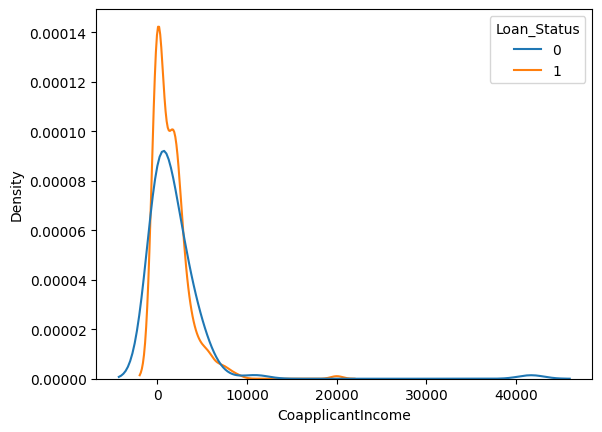

In [28]:
sns.kdeplot(data = train_set_bal, x = "CoapplicantIncome", hue = "Loan_Status")
plt.show()

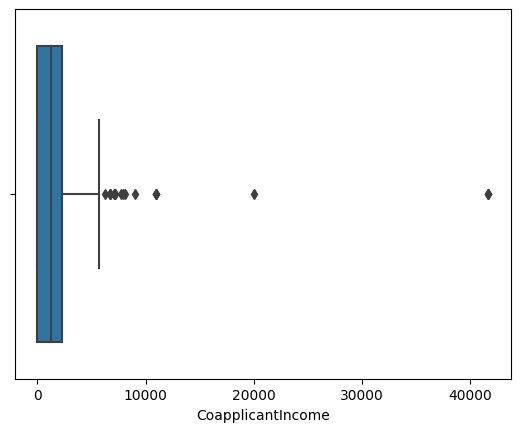

In [29]:
sns.boxplot(data = train_set_bal, x = "CoapplicantIncome")
plt.show()

### Visualisasi Fitur LoanAmount

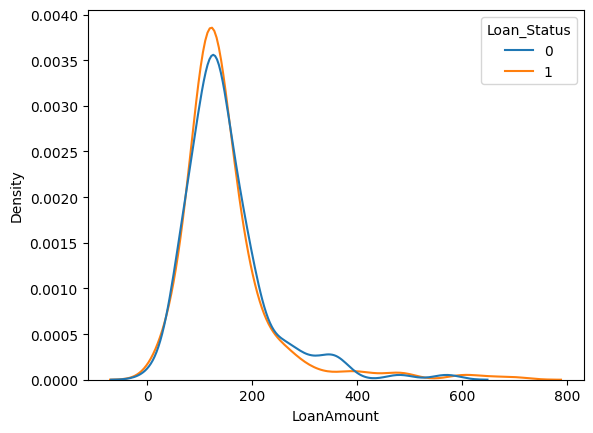

In [31]:
sns.kdeplot(data = train_set_bal, x = "LoanAmount", hue = "Loan_Status")
plt.show()

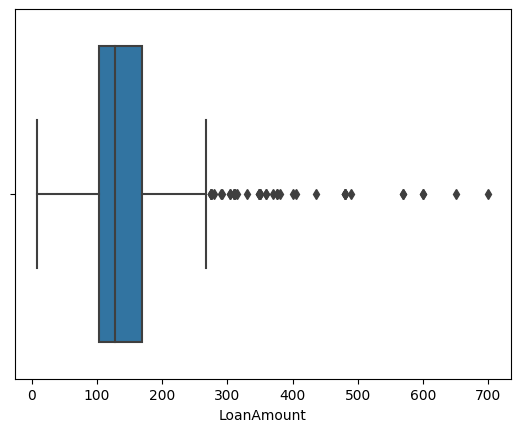

In [32]:
sns.boxplot(data = train_set_bal, x = "LoanAmount")
plt.show()

### Visualisasi Fitur Loan_Amount_Term

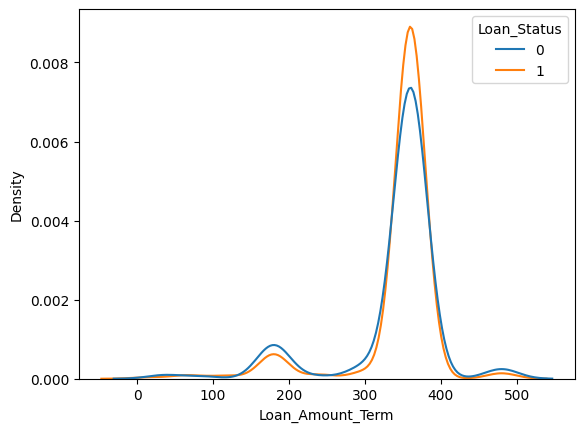

In [34]:
sns.kdeplot(data = train_set_bal, x = "Loan_Amount_Term", hue = "Loan_Status")
plt.show()

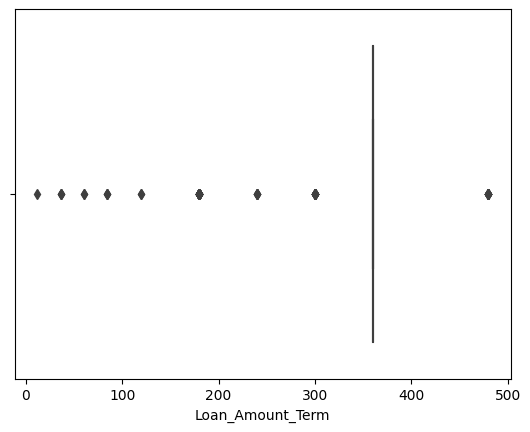

In [35]:
sns.boxplot(data = train_set_bal, x = "Loan_Amount_Term")
plt.show()

### Visualisasi Fitur Credit_History

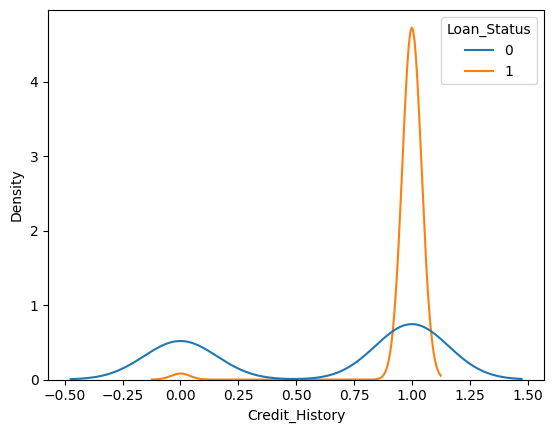

In [36]:
sns.kdeplot(data = train_set_bal, x = "Credit_History", hue = "Loan_Status")
plt.show()

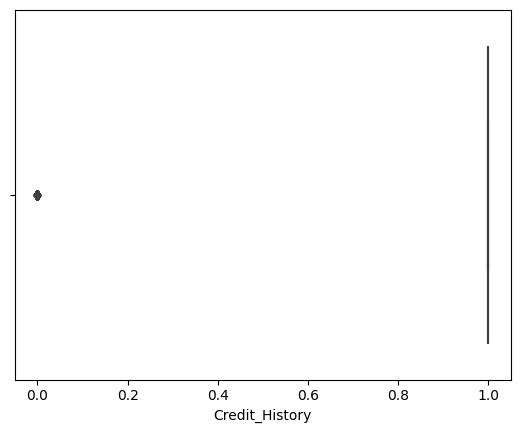

In [37]:
sns.boxplot(data = train_set_bal, x = "Credit_History")
plt.show()

# Korelasi Variabel Numerik

/tmp/ipykernel_5535/710797447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set_bal.corr(method = "spearman"), annot = True, ax = ax)


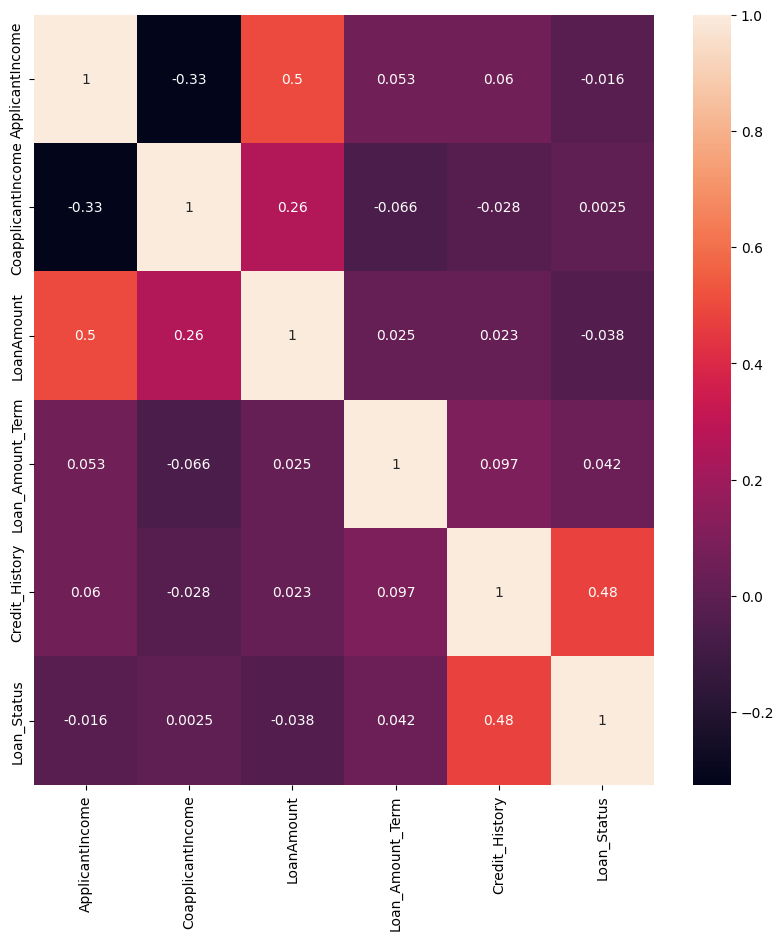

In [38]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set_bal.corr(method = "spearman"), annot = True, ax = ax)
plt.show()